Without inception module:

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 256)       33024     
_________________________________________________________________
flatten_1 (Flatten)          (None, 262144)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2621450   
Total params: 2,730,122
Trainable params: 2,730,122
Non-trainable params: 0
_________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/25
1563/1563 [==============================] - 26s 16ms/step - loss: 1.8373 - accuracy: 0.3404 - val_loss: 1.3296 - val_accuracy: 0.5345
Epoch 2/25
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1906 - accuracy: 0.5784 - val_loss: 1.0747 - val_accuracy: 0.6226
Epoch 3/25
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9060 - accuracy: 0.6840 - val_loss: 1.0341 - val_accuracy: 0.6417
Epoch 4/25
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7033 - accuracy: 0.7587 - val_loss: 1.0137 - val_accuracy: 0.6522
Epoch 5/25
1563/1563 [==============================] - 25s 16ms/step - loss: 0.5235 - accuracy: 0.8238 - val_loss: 1.0571 - val_accuracy: 0.6532
Epoch 6/25
1563/1563 [==============================] - 25s 16ms/step - loss: 0.3704 - accuracy: 0.8820 - val_loss: 1.1358 - val_accuracy: 0.6557
Epoch 7/25
1563/1563 [==============================] - 25s 16ms/step - loss: 0.2408 - accuracy: 0.9285 - val_loss: 1.2809 -

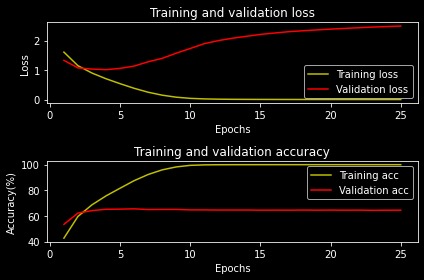

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('dark_background')

import keras
from keras.datasets import cifar10
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import os
from keras.layers import Flatten, Dense, Concatenate
from keras.optimizers import SGD
from keras.layers import Input
from keras.models import Model

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


input_img = Input(shape = (32, 32, 3))
out_l = Conv2D(64, (3,3), padding='same', activation='relu')(input_img)
out_l = Conv2D(128, (3,3), padding='same', activation='relu')(out_l)
out_l = Conv2D(256, (1,1), padding='same', activation='relu')(out_l)


output = Flatten()(out_l)
out    = Dense(10, activation='softmax')(output)

model = Model(inputs = input_img, outputs = out)
print(model.summary())


epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

plt.figure()  # create a plot figure
# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# create the second panel and set current axis
plt.subplot(2, 1, 2)

acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, [x*100 for x in acc], 'y', label='Training acc')
plt.plot(epochs, [x*100 for x in val_acc], 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.tight_layout()
plt.show()

With one inception module:

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 32, 32, 64)   1792        input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, 32, 32, 128)  73856       conv2d_23[0][0]                  
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 32, 32, 256)  33024       conv2d_24[0][0]                  
____________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/25
1563/1563 [==============================] - 53s 33ms/step - loss: 1.8218 - accuracy: 0.3420 - val_loss: 1.2830 - val_accuracy: 0.5419
Epoch 2/25
1563/1563 [==============================] - 51s 33ms/step - loss: 1.1824 - accuracy: 0.5806 - val_loss: 1.1193 - val_accuracy: 0.6110
Epoch 3/25
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9031 - accuracy: 0.6840 - val_loss: 0.9047 - val_accuracy: 0.6848
Epoch 4/25
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7199 - accuracy: 0.7537 - val_loss: 0.9346 - val_accuracy: 0.6771
Epoch 5/25
1563/1563 [==============================] - 53s 34ms/step - loss: 0.5583 - accuracy: 0.8071 - val_loss: 0.9547 - val_accuracy: 0.6823
Epoch 6/25
1563/1563 [==============================] - 53s 34ms/step - loss: 0.4177 - accuracy: 0.8616 - val_loss: 0.9639 - val_accuracy: 0.6971
Epoch 7/25
1563/1563 [==============================] - 54s 35ms/step - loss: 0.2719 - accuracy: 0.9142 - val_loss: 1.0906 -

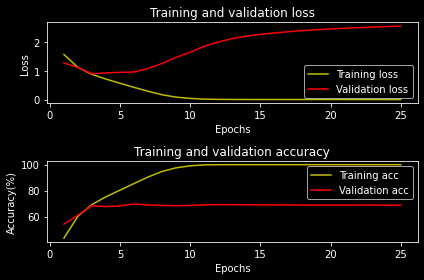

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('dark_background')

import keras
from keras.datasets import cifar10
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import os
from keras.layers import Flatten, Dense, Concatenate
from keras.optimizers import SGD
from keras.layers import Input
from keras.models import Model

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


input_img = Input(shape = (32, 32, 3))
out_l = Conv2D(64, (3,3), padding='same', activation='relu')(input_img)
out_l = Conv2D(128, (3,3), padding='same', activation='relu')(out_l)
out_l = Conv2D(256, (1,1), padding='same', activation='relu')(out_l)

path_1 = Conv2D(64, (1,1), padding='same', activation='relu')(out_l)
path_1 = Conv2D(64, (3,3), padding='same', activation='relu')(path_1)
path_2 = Conv2D(64, (1,1), padding='same', activation='relu')(out_l)
path_2 = Conv2D(64, (5,5), padding='same', activation='relu')(path_2)
path_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(out_l)
path_3 = Conv2D(64, (1,1), padding='same', activation='relu')(path_3)

out_l = Concatenate()([path_1, path_2, path_3])

output = Flatten()(out_l)
out    = Dense(10, activation='softmax')(output)

model = Model(inputs = input_img, outputs = out)
print(model.summary())


epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

plt.figure()  # create a plot figure
# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# create the second panel and set current axis
plt.subplot(2, 1, 2)

acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, [x*100 for x in acc], 'y', label='Training acc')
plt.plot(epochs, [x*100 for x in val_acc], 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.tight_layout()
plt.show()

With two inception module:

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_44 (Conv2D)              (None, 32, 32, 64)   1792        input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_45 (Conv2D)              (None, 32, 32, 128)  73856       conv2d_44[0][0]                  
__________________________________________________________________________________________________
conv2d_46 (Conv2D)              (None, 32, 32, 256)  33024       conv2d_45[0][0]                  
____________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/25
1563/1563 [==============================] - 79s 50ms/step - loss: 1.8451 - accuracy: 0.3308 - val_loss: 1.3144 - val_accuracy: 0.5344
Epoch 2/25
1563/1563 [==============================] - 77s 49ms/step - loss: 1.2356 - accuracy: 0.5617 - val_loss: 1.0370 - val_accuracy: 0.6308
Epoch 3/25
1563/1563 [==============================] - 76s 49ms/step - loss: 0.9465 - accuracy: 0.6706 - val_loss: 0.9281 - val_accuracy: 0.6756
Epoch 4/25
1563/1563 [==============================] - 76s 49ms/step - loss: 0.7500 - accuracy: 0.7398 - val_loss: 0.8887 - val_accuracy: 0.6914
Epoch 5/25
1563/1563 [==============================] - 77s 49ms/step - loss: 0.6060 - accuracy: 0.7891 - val_loss: 0.8913 - val_accuracy: 0.7013
Epoch 6/25
1563/1563 [==============================] - 77s 49ms/step - loss: 0.4579 - accuracy: 0.8429 - val_loss: 0.8980 - val_accuracy: 0.7084
Epoch 7/25
1563/1563 [==============================] - 77s 49ms/step - loss: 0.3209 - accuracy: 0.8919 - val_loss: 0.9453 -

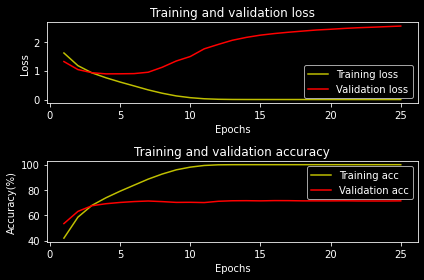

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('dark_background')

import keras
from keras.datasets import cifar10
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import os
from keras.layers import Flatten, Dense, Concatenate
from keras.optimizers import SGD
from keras.layers import Input
from keras.models import Model

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


input_img = Input(shape = (32, 32, 3))
out_l = Conv2D(64, (3,3), padding='same', activation='relu')(input_img)
out_l = Conv2D(128, (3,3), padding='same', activation='relu')(out_l)
out_l = Conv2D(256, (1,1), padding='same', activation='relu')(out_l)

path_1 = Conv2D(64, (1,1), padding='same', activation='relu')(out_l)
path_1 = Conv2D(64, (3,3), padding='same', activation='relu')(path_1)
path_2 = Conv2D(64, (1,1), padding='same', activation='relu')(out_l)
path_2 = Conv2D(64, (5,5), padding='same', activation='relu')(path_2)
path_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(out_l)
path_3 = Conv2D(64, (1,1), padding='same', activation='relu')(path_3)

out_l = Concatenate()([path_1, path_2, path_3])

path_1 = Conv2D(64, (1,1), padding='same', activation='relu')(out_l)
path_1 = Conv2D(64, (3,3), padding='same', activation='relu')(path_1)
path_2 = Conv2D(64, (1,1), padding='same', activation='relu')(out_l)
path_2 = Conv2D(64, (5,5), padding='same', activation='relu')(path_2)
path_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(out_l)
path_3 = Conv2D(64, (1,1), padding='same', activation='relu')(path_3)

out_l = Concatenate()([path_1, path_2, path_3])

output = Flatten()(out_l)
out    = Dense(10, activation='softmax')(output)

model = Model(inputs = input_img, outputs = out)
print(model.summary())


epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

plt.figure()  # create a plot figure
# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# create the second panel and set current axis
plt.subplot(2, 1, 2)

acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, [x*100 for x in acc], 'y', label='Training acc')
plt.plot(epochs, [x*100 for x in val_acc], 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.tight_layout()
plt.show()

With three inception module:

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_57 (Conv2D)              (None, 32, 32, 64)   1792        input_8[0][0]                    
__________________________________________________________________________________________________
conv2d_58 (Conv2D)              (None, 32, 32, 128)  73856       conv2d_57[0][0]                  
__________________________________________________________________________________________________
conv2d_59 (Conv2D)              (None, 32, 32, 256)  33024       conv2d_58[0][0]                  
____________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/25
1563/1563 [==============================] - 106s 67ms/step - loss: 1.9700 - accuracy: 0.2778 - val_loss: 1.4949 - val_accuracy: 0.4430
Epoch 2/25
1563/1563 [==============================] - 103s 66ms/step - loss: 1.3024 - accuracy: 0.5351 - val_loss: 1.0214 - val_accuracy: 0.6380
Epoch 3/25
1563/1563 [==============================] - 104s 66ms/step - loss: 0.9421 - accuracy: 0.6680 - val_loss: 0.9789 - val_accuracy: 0.6640
Epoch 4/25
1563/1563 [==============================] - 104s 67ms/step - loss: 0.7721 - accuracy: 0.7312 - val_loss: 0.8631 - val_accuracy: 0.7042
Epoch 5/25
1563/1563 [==============================] - 103s 66ms/step - loss: 0.6222 - accuracy: 0.7851 - val_loss: 0.8132 - val_accuracy: 0.7228
Epoch 6/25
1563/1563 [==============================] - 103s 66ms/step - loss: 0.4906 - accuracy: 0.8309 - val_loss: 0.8472 - val_accuracy: 0.7174
Epoch 7/25
1563/1563 [==============================] - 103s 66ms/step - loss: 0.3598 - accuracy: 0.8788 - val_loss: 0

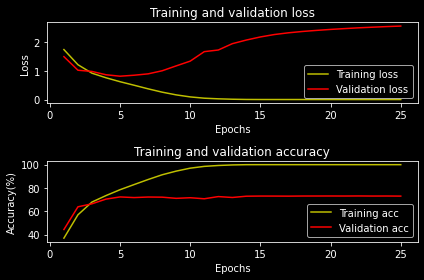

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('dark_background')

import keras
from keras.datasets import cifar10
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import os
from keras.layers import Flatten, Dense, Concatenate
from keras.optimizers import SGD
from keras.layers import Input
from keras.models import Model

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


input_img = Input(shape = (32, 32, 3))
out_l = Conv2D(64, (3,3), padding='same', activation='relu')(input_img)
out_l = Conv2D(128, (3,3), padding='same', activation='relu')(out_l)
out_l = Conv2D(256, (1,1), padding='same', activation='relu')(out_l)

path_1 = Conv2D(64, (1,1), padding='same', activation='relu')(out_l)
path_1 = Conv2D(64, (3,3), padding='same', activation='relu')(path_1)
path_2 = Conv2D(64, (1,1), padding='same', activation='relu')(out_l)
path_2 = Conv2D(64, (5,5), padding='same', activation='relu')(path_2)
path_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(out_l)
path_3 = Conv2D(64, (1,1), padding='same', activation='relu')(path_3)

out_l = Concatenate()([path_1, path_2, path_3])

path_1 = Conv2D(64, (1,1), padding='same', activation='relu')(out_l)
path_1 = Conv2D(64, (3,3), padding='same', activation='relu')(path_1)
path_2 = Conv2D(64, (1,1), padding='same', activation='relu')(out_l)
path_2 = Conv2D(64, (5,5), padding='same', activation='relu')(path_2)
path_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(out_l)
path_3 = Conv2D(64, (1,1), padding='same', activation='relu')(path_3)

out_l = Concatenate()([path_1, path_2, path_3])

path_1 = Conv2D(64, (1,1), padding='same', activation='relu')(out_l)
path_1 = Conv2D(64, (3,3), padding='same', activation='relu')(path_1)
path_2 = Conv2D(64, (1,1), padding='same', activation='relu')(out_l)
path_2 = Conv2D(64, (5,5), padding='same', activation='relu')(path_2)
path_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(out_l)
path_3 = Conv2D(64, (1,1), padding='same', activation='relu')(path_3)

out_l = Concatenate()([path_1, path_2, path_3])

output = Flatten()(out_l)
out    = Dense(10, activation='softmax')(output)

model = Model(inputs = input_img, outputs = out)
print(model.summary())


epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

plt.figure()  # create a plot figure
# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# create the second panel and set current axis
plt.subplot(2, 1, 2)

acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, [x*100 for x in acc], 'y', label='Training acc')
plt.plot(epochs, [x*100 for x in val_acc], 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.tight_layout()
plt.show()